# НИР Лабораторная работа № 1

## Постановка задачи

1) **Для переодического сигнала и цветного шума**
- Расчитать Автокорреляционную функцию $\psi(\tau)$;
- Вычислить время корреляции $\tau_c$.



2) **Выбрать динамической систему, и для данной системы**
- сформировать временной ряд;
- Расчитать Автокорреляционную функцию $\psi(\tau)$;
- Вычислить время корреляции $\tau_c$.

## Теоретическая часть

Автокорреляционная функция (АКФ) эргодического случайного процеса $X(t)$, имеющая конечную длительность $T$:
$$\psi(\tau) = \frac{1}{T - \tau} \int_0^{T - \tau} (x(t) - \langle X \rangle) (x(t + \tau) - \langle X \rangle) dt,$$

где $0 \le \tau < T$, $\langle X \rangle ~- $ среднее по времени значение.

Для дискретного набора данных
$$\psi(m) = \psi(m\Delta t) = \frac{1}{N - m} \sum_{i=1}^{N-m} \bigl ( x_i - \langle X \rangle \bigr) \bigl ( x_{i + m} - \langle X \rangle \bigr),$$

Здесь $m = 0,~1,...,~M~-$ число шагов дискретизации, $M << N.$

Функция $\psi(\tau)$ характеризует степень линейной зависимости между значениями случайного процесса, сдвинутыми друг относительно друга на интервале времени $\tau$. Для периодической функции времени $\psi(\tau)$ также является периодической функцией с тем же самым периодом. 

Чтобы определить, как быстро теряется статическая взаимосвязь между значениями сдучайного процесса $X(t)$ и $X(t + \tau)$, вводят понятие *времени корреляции*. Рассмотрим АКФ, которая стремится к нулю c ростом $\tau$, и имеет затухающий характер.
![Автокорреляционная функция и ее огибающая](images/1.svg)

Пусть $\gamma(\tau)~-$ огибающая функции $\psi(\tau)$. Время корреляции $\tau_c$ слуяайного процесса $X(t)$ определяется как временной интервал, в течении которого огибающая $\gamma(\tau)$ спадает в $h$ раз, где $h~-$ некоторое заданное значение.

Зависимсоть $\gamma(\tau)$ может иметь очень сложный вид, при котором ее не удается апроксимировать экспонициальной или степенной функцией. В таком случае рассматривается другой способо нахождения *времени корреляции*:
$$\tau_c = \dfrac{1}{\sigma^2} \int\limits_0^{\infty}\gamma(\tau)d\tau$$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#Функция для построения графика
def graph(ax, x, y, color=None, yl=None, title=None, marker=None, label=None, xl=r'$\mathcal{\tau}$', rotation=0):
    
    ax.plot(x, y, color=color, marker=marker, label=label)
    ax.set_xlabel(xl, loc='right', size=16)
    ax.set_ylabel(ylabel=yl, rotation=rotation, size=16)
    ax.tick_params(labelsize=12)
    ax.set(title=title)
    
    ax.grid()

## 1) Переодический сигнал и цветной шум

### Переодический сигнал

Периодическим сигналом называют такой вид воздействия, когда форма сигнала повторяется через некоторый интервал времени $T$ (период).

Вкачестве переодического сигнала возьмем сигнал описываемый функцией вида

$$f(t) = \frac{V}{2} - \frac{V}{\pi}\bigl(\sin(\omega t) + \frac{1}{2}\sin(2\omega t)\bigr),$$

где амплитуда $V = 5$, и период $T = 20$.

In [3]:
# Переодический сигнал
def period_signal(t):
    # Амплитуда V и период T
    V, T = 5, 20
    w = 2 * np.pi / T
    
    return 0.5 * V - V * (np.sin(w * t) + 0.5 * np.sin(2 * w * t)) / np.pi

<IPython.core.display.Javascript object>


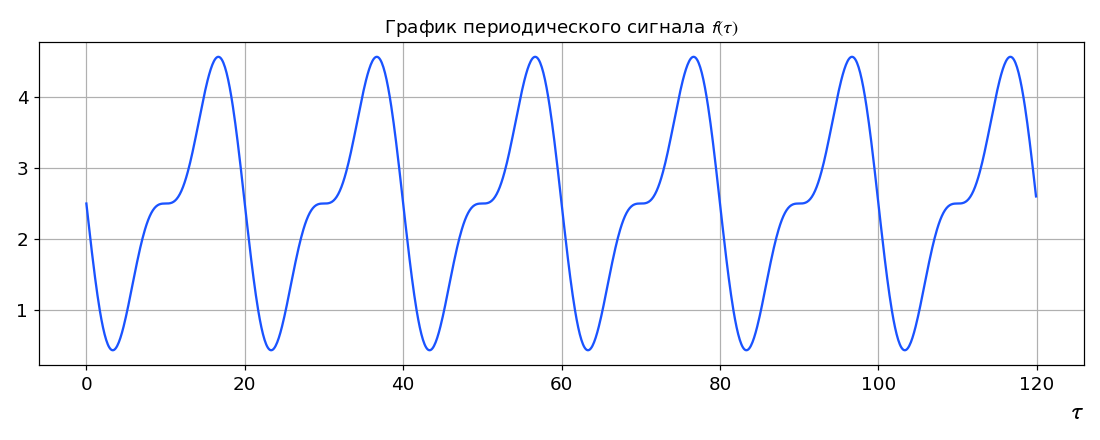

In [4]:
# Время реализации сигнала
tau = np.arange(0, 120, 0.1)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
graph(ax, tau, period_signal(tau), color='#1a53ff', title=r'График периодического сигнала $\mathcal{f(\tau)}$')
plt.tight_layout()

In [5]:
print(f'Среднее по времени периодического сигнала: {period_signal(tau).mean()}')

Среднее по времени периодического сигнала: 2.5


С учетом значения среднего, АКФ $\psi(\tau)$ переодического сигнала имеет будет иметь следующий вид

$$\psi(\tau) = \frac{1}{T - \tau} \int_0^{T - \tau} (f(t) - 2.5) (f(t + \tau) - 2.5) dt,$$


$$\psi(\tau) = \frac{1}{T - \tau} \int_0^{T - \tau} \Bigl(\frac{5}{\pi}\sin(\omega t) + \frac{5}{2\pi}\sin(2\omega t) \Bigr)  \Bigl(\frac{5}{\pi}\sin(\omega (t + \tau)) + \frac{5}{2\pi}\sin(2\omega (t + \tau)) \Bigr) dt = \\ \frac{1}{T - \tau} \left. \frac{25}{96\pi^2 \omega}\Bigl\{ 24\sin(\omega(t - \tau) - 24\sin(\omega(2t + \tau)) - 3\sin(2\omega(2t + \tau)) - 8\sin(\omega(3t + \tau)) + \\ 24\sin(\omega(t + 2\tau)) -8\sin(\omega(3t + 2\tau)) + 48t\omega\cos(\omega\tau) + 12t\omega\cos(2\tau\omega) \Bigr\} \right|_0^{T - \tau} = \\ \frac{1}{T - \tau}\frac{25}{96\pi^2 \omega}\Bigl\{24\sin(\omega(T - 2\tau) - 24\sin(\omega(2T - \tau)) - 3\sin(2\omega(2T - \tau)) - 8\sin(\omega(3T - 2\tau)) + \\ 24\sin(\omega(T + \tau)) - 8\sin(\omega(3T - \tau)) + 48(T - \tau)\omega\cos(\omega\tau) + 12(T - \tau)\omega\cos(2\tau\omega) \\ + 54\sin(\omega\tau) - 13\sin(2\omega\tau)\Bigr\}.$$

In [6]:
# Полученная АКФ f(t)
def akf_period_signal(t):
    T = 200
    w = 2 * np.pi / 20
    
    return 25 * (24 * np.sin(w * (T - 2 * t)) - 24 * np.sin(w * (2 * T - t)) - 3 * np.sin(2 * w * (2 * T - t))\
                - 8 * np.sin(w * (3 * T - 2 * t)) + 24 * np.sin(w * (T + t)) - 8 * np.sin(w * (3 * T - t))\
                + 48 * (T - t) * w * np.cos(w * t) + 12 * (T - t) * w * np.cos(2 * t * w)\
                + 54 * np.sin(w * t) - 13 * np.sin(2 * w * t) ) / ((T - t) * 96 * w * np.pi * np.pi)

<IPython.core.display.Javascript object>


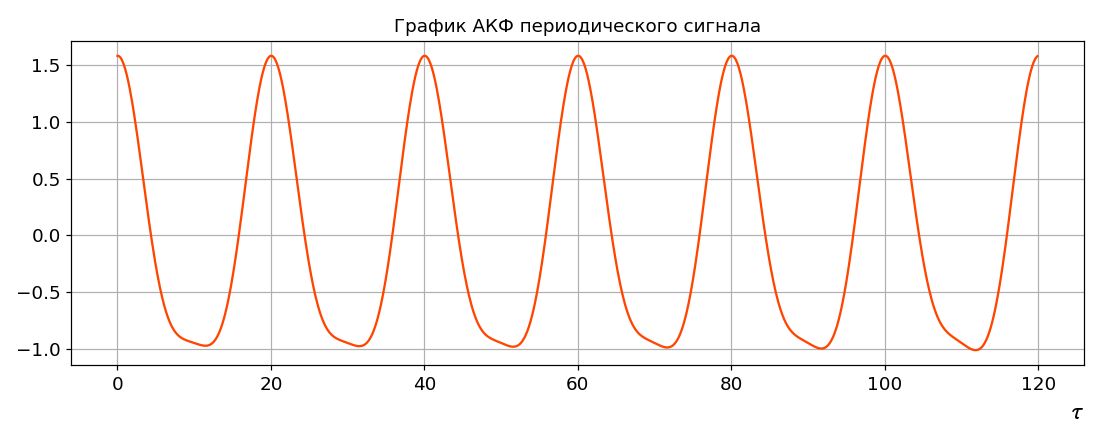

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
graph(ax, tau, akf_period_signal(tau), color='#FF4500', title='График АКФ периодического сигнала')
plt.tight_layout()

Полученная Аавтокорреляционная функция $\psi(\tau)$ для переодического сигнала $f(\tau)$, также является периодической. Огибающей функции $\gamma(\tau)$ будет соответствовать функция вида $f(\tau) =  \sigma^2$. Откуда, согласно определению времени корреляции $\tau_c = \infty$.

### Цветной шум

В качестве примера *цветного шума* сгенирируем временной ряд, статистические свойства которого соответствуют *белому шуму*.

Чтобы полученный временной ряд был классифицирован как белый шум, должны быть выполнены следующие условия:
- Среднее значение равно нулю
- Стандартное отклонение постоянно - не меняется со временем.
- Корреляция между временным рядом и его смещенной версией не значима.

Создать ряд *белого шума*, можно взяв выборку из $N$ значений из стандартного нормального распределения.

In [16]:
white_noise = np.random.randn(200)

<IPython.core.display.Javascript object>


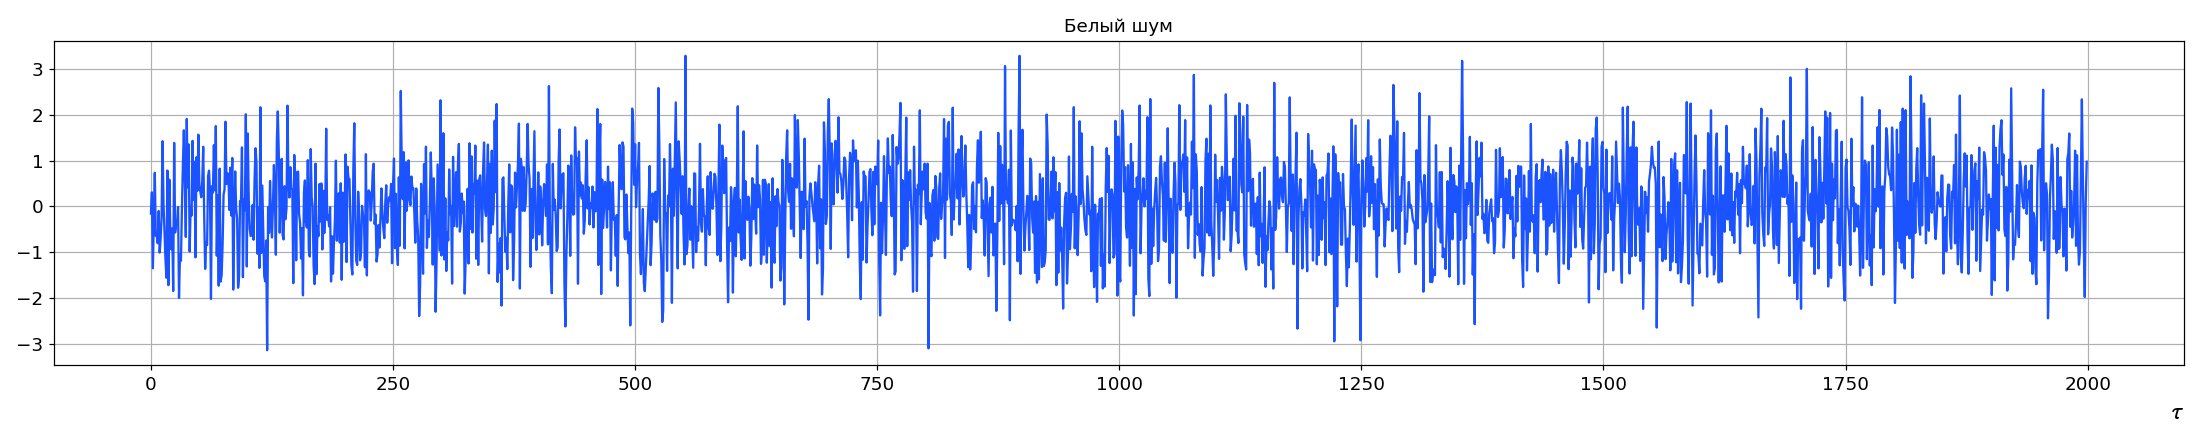

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

graph(ax, x=np.arange(len(white_noise)), y=white_noise, color='#1a53ff', title='Белый шум')
plt.tight_layout()

Визуально среднее значение и среднеквадратичное отклонение не меняются с течением времени. Нет видимых закономерностей.

Если среднее значение и среднеквадратичное отклонение не меняются со временем, то оба значения должны быть примерно одинаковы для двух любых подмножеств.

Проверим данное предположение, разбив ряд *белого шума* на произвольное число фрагментов (допустим $20$ по $100$ в каждом). И для каждого такого фрагмента вычислим среднее значение $\mu$ и стандартное отклонение $\sigma$. 

<IPython.core.display.Javascript object>


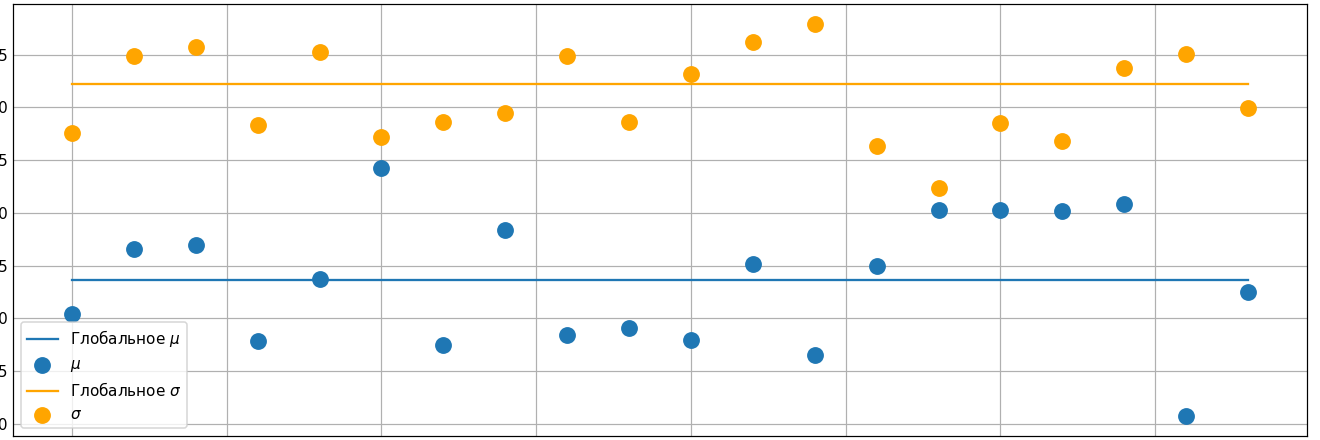

In [24]:
white_noise_fragments = np.split(white_noise, 20)
avgs, stds = [], []

for fragment in white_noise_fragments:
    avgs.append(fragment.mean())
    stds.append(fragment.std())

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set(title='Сравнение среднего и среднеквадратичного отклонения Белого Шума')

ax.plot(np.arange(len(avgs)), [white_noise.mean()] * len(avgs), label=r'Глобальное $\mu$', lw=1.5)
ax.scatter(x=np.arange(len(avgs)), y=avgs, label=r'$\mu$', s=100)

ax.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), 
        label=r'Глобальное $\sigma$', lw=1.5, color='orange')
ax.scatter(x=np.arange(len(stds)), y=stds, label=r'$\sigma$', color='orange', s=100)
ax.legend()

Здесь можно наблюдать небольшие вариации, но не одно из подмножеств не показывает значительных отличий от среднего.

Построим автокорреляционную функцию для оценки корреляция между полученным временным рядом и его смещенной версией.

In [25]:
# Реализации АКФ для дискретного набора данных.
def acf(m, data):
    data = np.array(data)
    data -= data.mean()
    
    return np.array([np.dot(data[0:len(data) - i], data[i:]) / (len(data) - i) for i in range(m)])

In [26]:
# Набор шагов дискретизации
m = np.arange(31)
acfs = acf(31, white_noise)

<IPython.core.display.Javascript object>


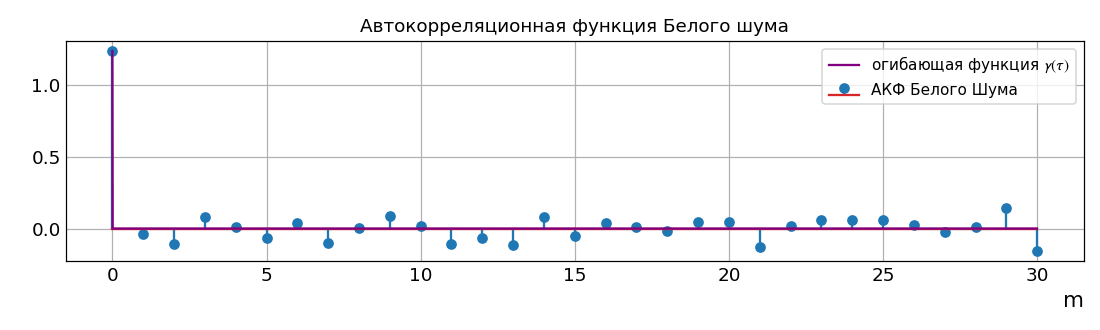

In [43]:
plt.style.use('_mpl-gallery')
fig, axs = plt.subplots(figsize=(10, 3))
axs.set_title('Автокорреляционная функция Белого шума')
axs.stem(m, acfs, label='АКФ Белого Шума')
axs.set_xlabel('m', size=14, loc='right')

x = np.arange(0, 30, 0.01)
y = np.array([acfs[0] if i == 0 else 0 for i in x])

axs.plot(x, y, c='purple', label=r'огибающая функция $\mathcal{\gamma(\tau)}$')

axs.tick_params(labelsize=12)
axs.legend()

fig.tight_layout()
plt.show()

Полученная АКФ хорошо описывается функцией вида $\gamma(\tau) = \sigma^2 \delta(\tau)$, где $\delta(\tau)~-$ 
дельта функция Дирака. Тогда время корреляции $\tau_c = 0$.

Следовательно, данный временной ряд и его версия смещенная на любое число $m$ не коррелированы. 

Таким образом сгенерированый набор значений удовлетворяет все три условия, и следовательно характеризует некий процесс являющийся *белым шумом*. 

## 2) Динамическая система

В качестве динамической системы была выбрана **модель Морриса-Лекара (ML)**:

*Модель Морриса-Лекара (Morris-Lecar)* является упрощенной *моделью нейрона Ходгкина-Хаксли (Hodgkin-Huxley)*. Она описывает такие свойства живого нейрона как генерация, так называемых, спайков (последовательность импульсов) и режим невосприимчивости к внешнему воздействию. 

**Модель**
$$C \frac{d\mathcal{v}}{dt} = I - g_L (\mathcal{v} - \mathcal{v}_L) - g_{Ca} m_{ss} (\mathcal{v} - \mathcal{v}_{Ca}) - g_K \omega (\mathcal{v} - \mathcal{v}_K),$$

$$\frac{d\omega}{dt} = \frac{\omega_{ss} - \omega}{\tau_{\omega}},$$

где 

$$m_{ss} = \dfrac{1}{2} \Bigl(1 + \tanh \Bigl[\dfrac{\mathcal{v} - \mathcal{v}_1}{\mathcal{v}_2} \Bigr] \Bigr),$$

$$\omega_{ss} = \dfrac{1}{2} \Bigl(1 + \tanh \Bigl[\dfrac{\mathcal{v} - \mathcal{v}_3}{\mathcal{v}_4} \Bigr] \Bigr),$$

$$\tau_{\omega}^{-1} = \Bigl(\varphi \cosh \Bigl[\dfrac{\mathcal{v} - \mathcal{v}_3}{2 \mathcal{v}_4} \Bigr] \Bigr).$$

**Переменные**
- $\mathcal{v}$: мембранный потенциал
- $\omega$: описывает активность калийного тока (переменная восстановления)


**Параметры и константы**
- $I$: внешний стимулирующий ток
- $C$: мембранная емкость
- $g_L$, $g_{Ca}$, $g_K$: утечки, проводимости $Ca^{++}$, и $K^+$ через мембранный канал
- $\mathcal{v}_{L}$, $\mathcal{v}_{Ca}$, $\mathcal{v}_{K}$: равновесные потенциалы, соответствующих ионных каналов
- $\mathcal{v}_1$, $\mathcal{v}_2$, $\mathcal{v}_3$, $\mathcal{v}_4$: настройка параметров для устойчивого состояния и постоянной времени
- $\varphi$: опорная частота

Характерные значения параметров и констант были взяты с сайта https://jonmarty.shinyapps.io/MorrisLecar/

In [15]:
C, phi = 6.69810502993, 0.025
g_L, g_Ca, g_K  = 0.5, 1.1, 2.0
v_L, v_Ca, v_K  = -50.0, 100.0, -70.0
v_1, v_2, v_3, v_4 = 30.0, 15.0, 0.0, 30.0 

In [16]:
# Реализация всех функций в данной модели
def m_ss(v):
    return 0.5 * (1 + np.tanh((v - v_1) / v_2))

def omega_ss(v):
    return 0.5 * (1 + np.tanh((v - v_3) / v_4))

def tau_omega(v):
    return 1 /(phi *  np.cosh((v - v_3) / v_4))

def diff_v(y, I):
    v = y[0]
    omega = y[1]
    
    return (I - g_L * (v - v_L) - g_Ca * m_ss(v) * (v - v_Ca) - g_K * omega * (v - v_K)) / C

def diff_omega(y):
    v = y[0]
    omega = y[1]
    
    return (omega_ss(v) - omega) / tau_omega(v)

def diff_system(y, I, x=None):
    return np.array([
        diff_v(y, I), 
        diff_omega(y)
        ])

Данная модель представляет собой систему нелинейных диференциальных уравнений первого порядка. Для нахождения переменных мембранного потенциала и активности калийного тока, воспользуемся методом Рунге-Куты Мерсона с постоянным шагом, т.к. искомые функции должны быть дискретизированы с постоянным шагом.

In [17]:
# Реализация метода Рунге-Кутты-Мерсона с переменным шагом
def solving(h, y, diff_sys, I, x=None):
    """
    На вход функция принимает текущий шаг h, и массив текущих значений v и omega.
    На выход функция возвращает кортеж из массива новых значениц v и omega, 
    и нового шага h_new.
    """
    # Функция для расчета вспомогательных величин K
    def K(step, add_y):
        return step * diff_sys(y + add_y, I) / 3

    K_1 = K(h, 0)
    K_2 = K(h, K_1)
    K_3 = K(h, 0.5 * (K_1 + K_2))
    K_4 = K(h, 3 * (K_1 + 3 * K_3) / 8)
    K_5 = K(h, 1.5 * K_1 - 4.5 * K_3 + 6 * K_4)
    
    error = 0.2 * (K_1 + 4 * K_4 - 4.5 * K_3 - 0.5 * K_5)
    delta_y = 0.5 * (K_1 + 2 * K_4 + K_5)
    
    return y + delta_y

In [18]:
def simulation(t_list, inputs, I_function):
    v_list     = []
    omega_list = []
    I_list = []
    y = inputs
    
    for t in t_list:
        v_list.append(y[0])
        omega_list.append(y[1])
        
        I = I_function(t)
        y = solving(h, y, diff_system, I)
        I_list.append(I)
        
    return pd.DataFrame({
        'membrane potential': v_list,
        'recovery variable': omega_list,
        'external current': I_list
    })

Начальные значения переменных

In [19]:
v_start = -52.14
omega_start = 0.02

T = 1200.
h = 0.01

y = np.array([v_start, omega_start])
t_list = np.arange(0, T, h)

Качественно эта система уравнений описывает сложную взаимосвязь между мембранным потенциалом и активацией ионных каналов внутри мембраны: потенциал зависит от активности ионных каналов, а активность ионных каналов зависит от приложенного внешнего напряжения. 

Таким образом вид временной зависимости динамической системы определяется временной зависимость приложенного внешнего тока.

Сформируем временные ряды для разных конфигураций прикладываемого внешнего тока

- $I = 0~-$ выключен,
- $I = 1~-$ включен,
- $I = 1$ если $t \in [t_1, t_2]$, то $I = 0~-$ включить-выключить.
- $I = \sin\bigl(\dfrac{\pi t}{20}\bigr)~-$ периодический сигнал,
- $I~-$ белый шум,


In [20]:
df_period = simulation(t_list, y, lambda t: np.sin(0.05 * np.pi * t))
df_off    = simulation(t_list, y, lambda t: 0)
df_noise  = simulation(t_list, y, lambda t: np.random.randn())
df_one    = simulation(t_list, y, lambda t: 1 if t > 100 and t < 200 else 0)
df_on     = simulation(t_list, y, lambda t: 1)

In [21]:
def matrix_graph(axs, x, y, row, title=[None] * 4):
    graph(axs[row, 0], x, y['external current'], color='#ff0055',yl='$I(A)$', title=title[0])
    graph(axs[row, 1], x, y['membrane potential'], color='#1a53ff', yl=r'$\mathcal{v}$', title=title[1])
    graph(axs[row, 2], x, y['recovery variable'], color='#ff471a', yl=r'$\mathcal{\omega}$', title=title[2])
    graph(axs[row, 3], y['recovery variable'], y['membrane potential'], 
          color='#8000ff', xl=r'$\omega$', yl=r'$\mathcal{v}$', title=title[3])


<IPython.core.display.Javascript object>


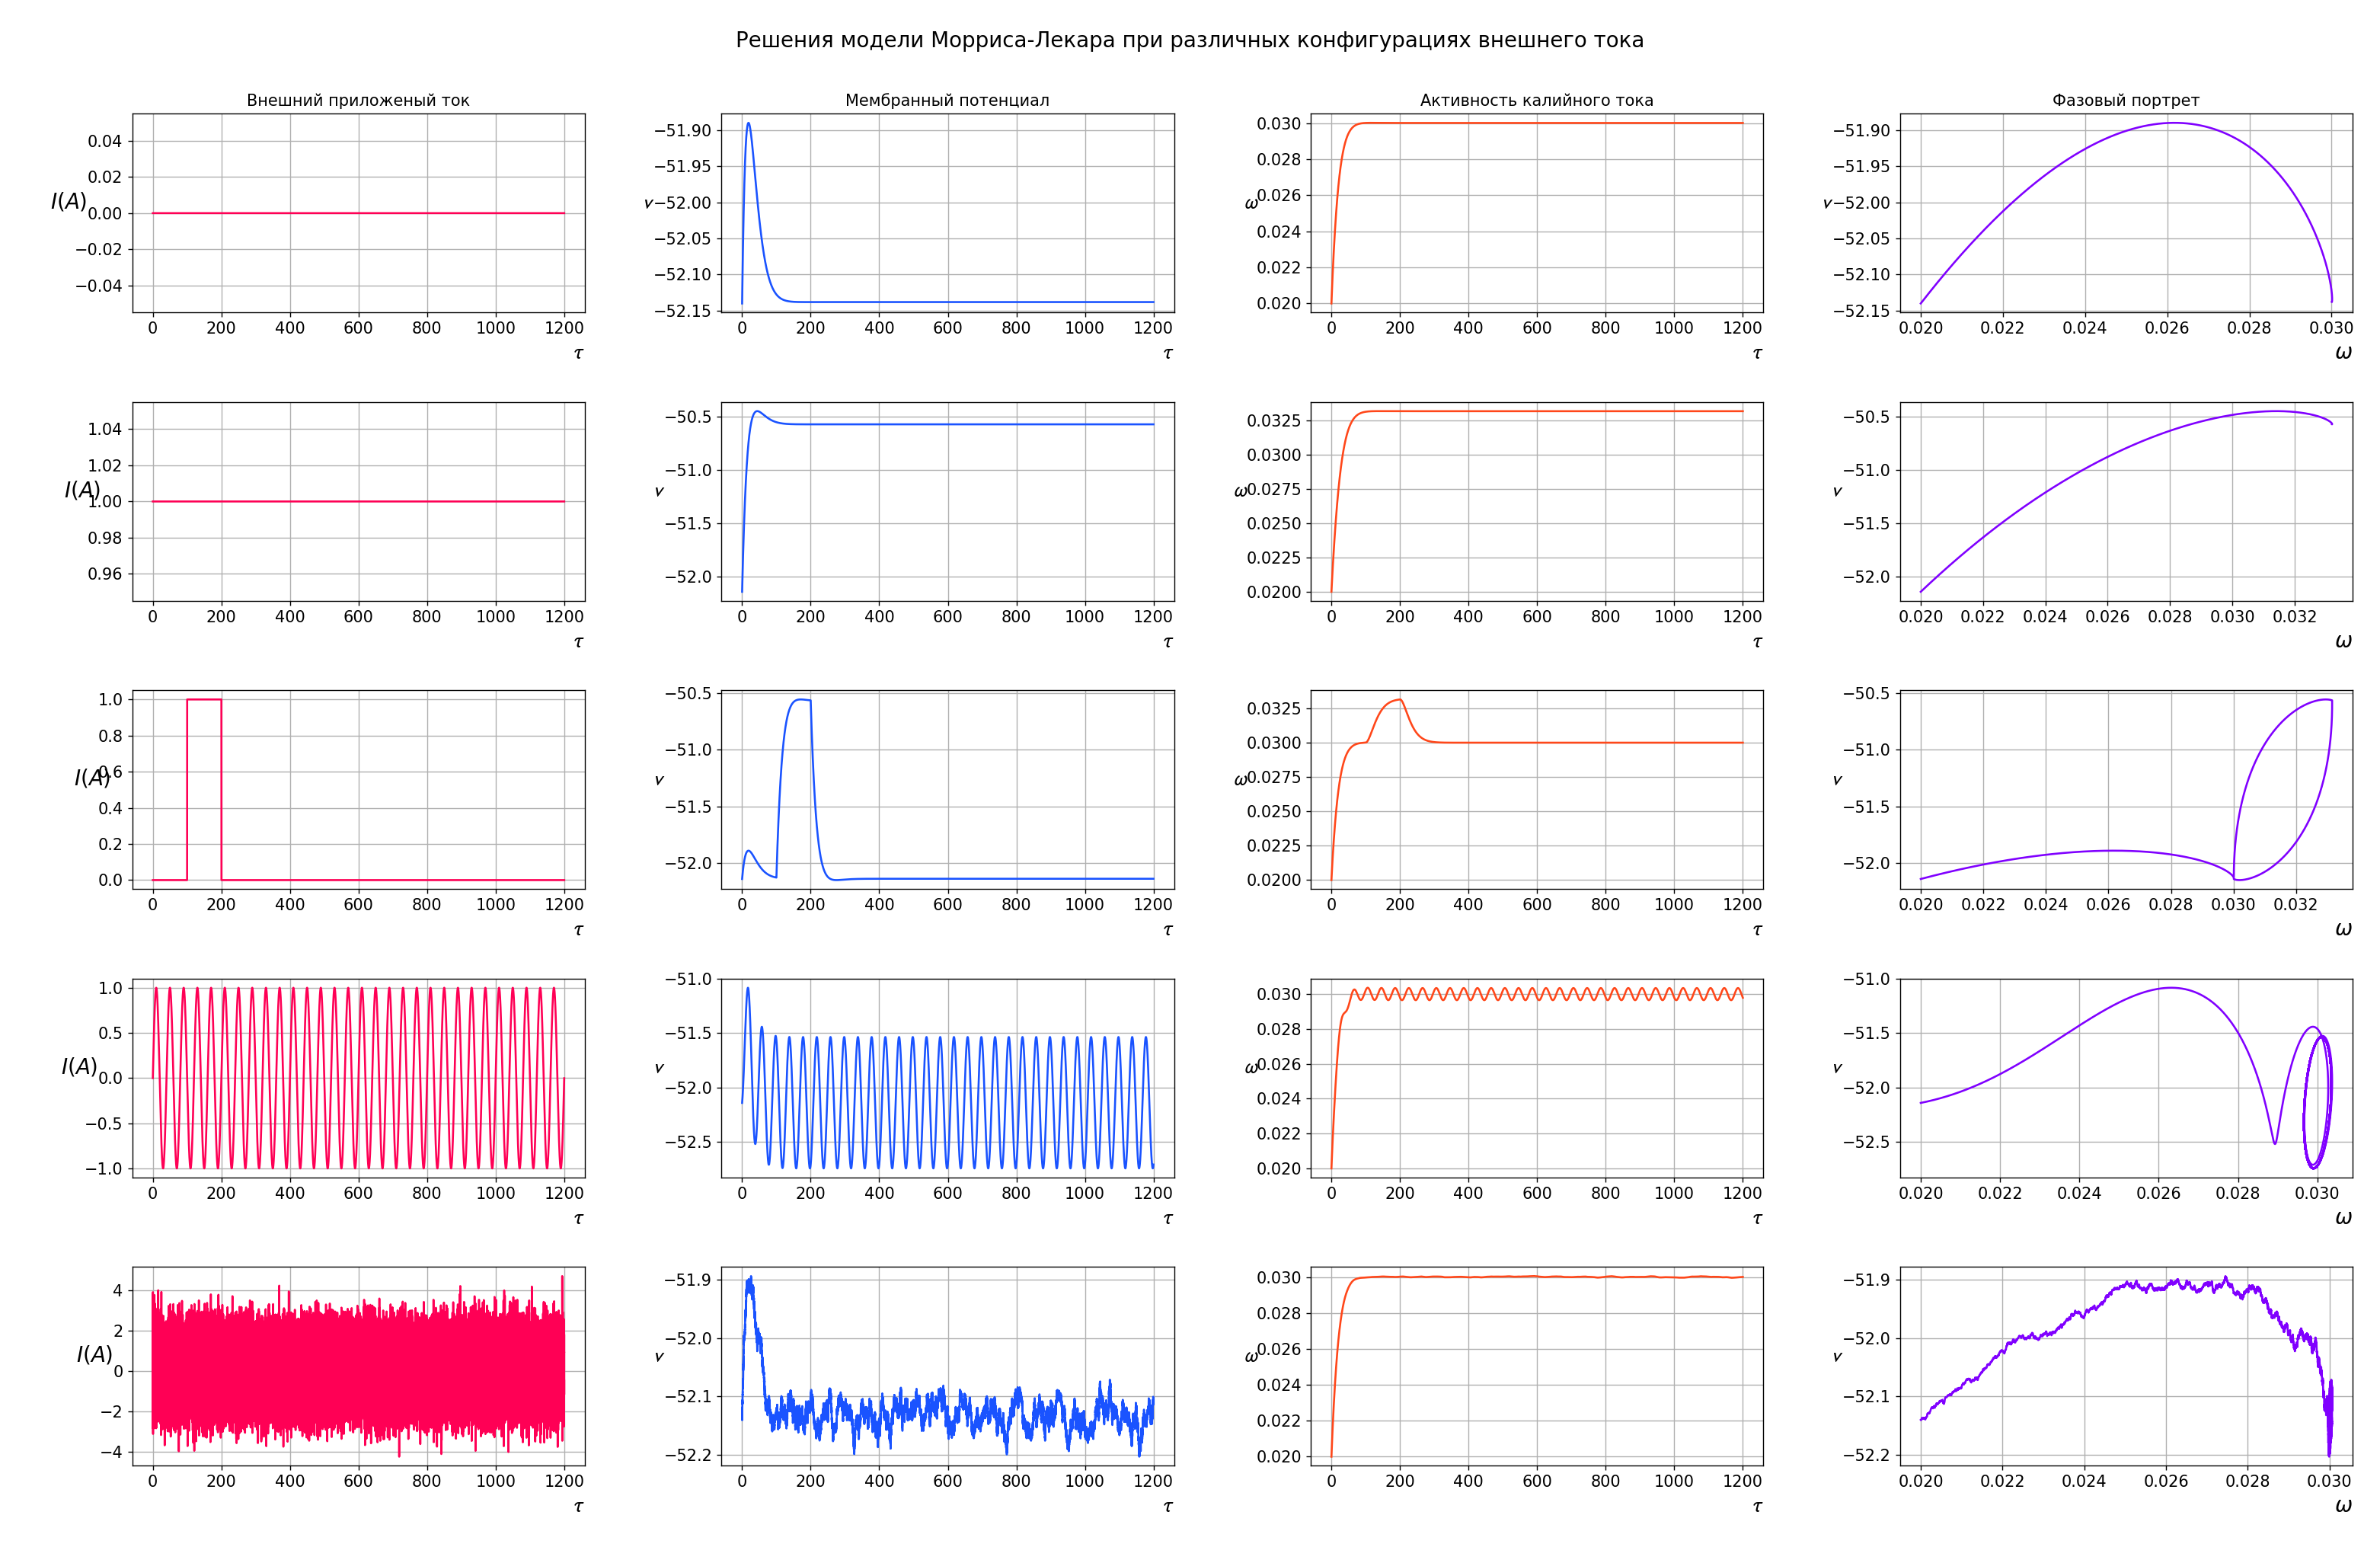

In [22]:
fig, axs = plt.subplots(5, 4, figsize=(20, 13))

matrix_graph(axs, t_list, df_off, 0, title=['Внешний приложеный ток', "Мембранный потенциал", 
                                            "Активность калийного тока", "Фазовый портрет"])
matrix_graph(axs, t_list, df_on, 1)
matrix_graph(axs, t_list, df_one, 2)
matrix_graph(axs, t_list, df_period, 3)
matrix_graph(axs, t_list, df_noise, 4)

fig.suptitle("Решения модели Морриса-Лекара при различных конфигурациях внешнего тока\n", size=16)
plt.tight_layout()

Большая часть полученных временных зависимостей мембранног потенциала $\mathcal{v}$ и переменной восстановления $\omega$ имеют одиночный выброс, и дальнейший уход в стационарое состояние до конца времени реализации данных процессов. В таком случае, наблюдаемы процессы не является случайными, нахождение АКФ не имеет смысла.

Найдем автокорреляционные функции для следующих случаев:
- $\mathcal{v}$ и $\omega$ *для периодического сигнала*
- $\mathcal{v}$ для *белого шума*

Найдем автокореляционные функции для конфигурации *периодический сигнал* с числом шагов дискретизации $m = 12 000$. 

In [23]:
m_ = 12001
acf_v     = acf(m_, df_period['membrane potential'])
acf_omega = acf(m_, df_period['recovery variable'])

# Переход от числа шагов дискретизации к единицам времени наблюдения
t = np.array([i * h for i in range(m_)])

<IPython.core.display.Javascript object>


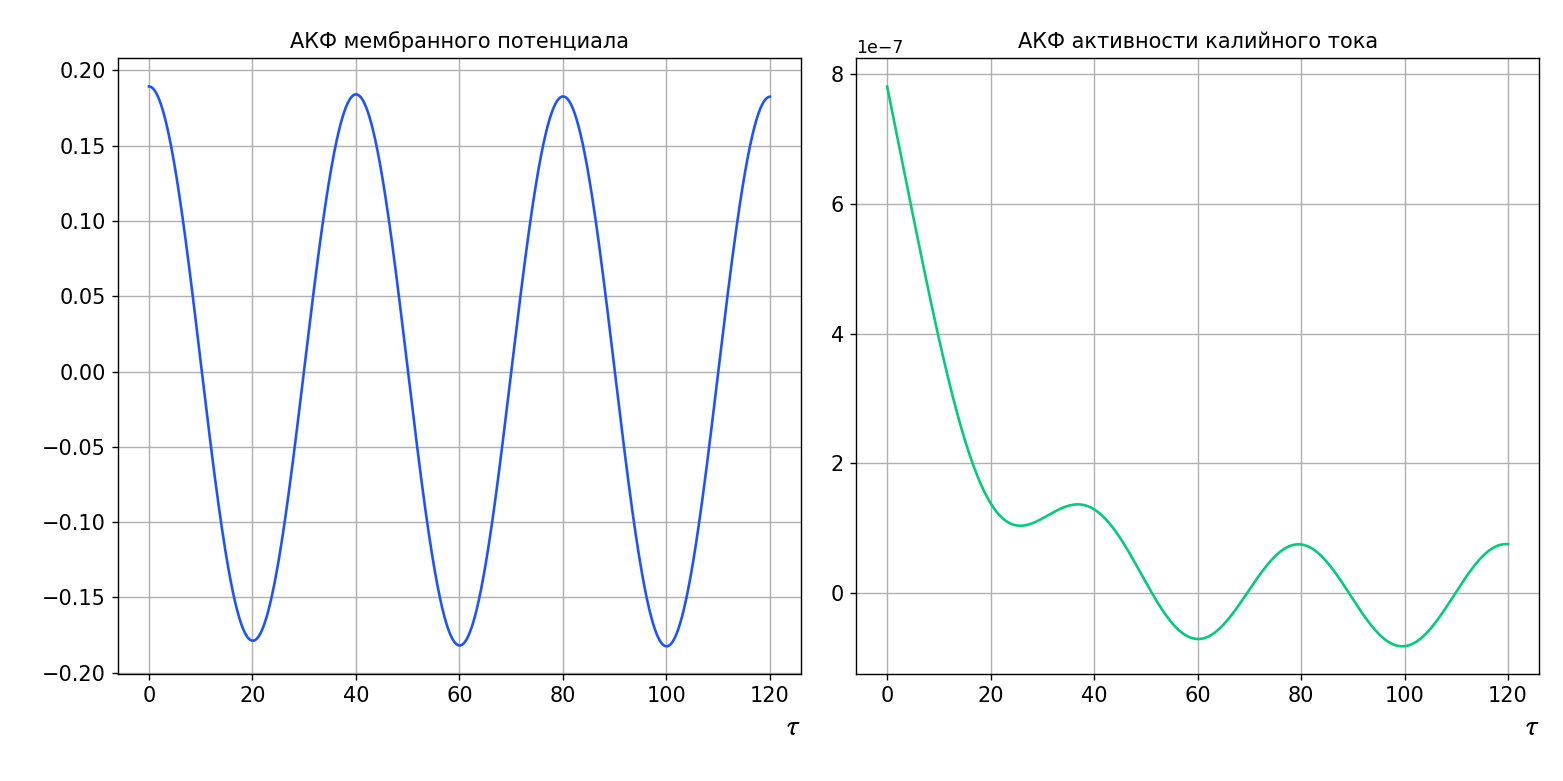

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

graph(ax1, t, acf_v, color='#1a53ff', title="АКФ мембранного потенциала")
graph(ax2, t, acf_omega, color='#00cc7a', title="АКФ активности калийного тока")

plt.tight_layout()

Из графика АКФ мембранного потенциала можно заметить незначительное уменьшении амплитуды колебания на протяжении всего времени наблюдения, соответствующему выбранному числу шагов дискретизации. 

АКФ активности калийного тока имеет резкий спад на интервале времини от $0$ до $T_{p}$, где $T_p~-$ период колебания внешнего приложенного тока. Дальнейшее поведение этой АКФ аналогично поведению АКФ мембранного потенциала.

Найдем огибающие функции $\gamma(\tau)$ и время кореляции $\tau_c$ для каждой АКФ. 

Для построения огибающей функции отберем все локальные максимумы автокореляционной функции.

In [25]:
max_v = np.array([acf_v[i] for i in range(0, m_, 4000)])
max_omega = np.array([acf_omega[i] for i in range(0, m_, 4000)])
max_t = np.arange(0, m_ / 100, 40, dtype=int)

$\gamma(\tau)$ для мембранного потенциала будем искать в виде экспоненциальной зависимости: $\gamma(\tau) = \beta \exp(-\alpha\tau).$

In [26]:
# Метод наименьших квадратов
A = np.vstack([max_t, np.ones(len(max_t))]).T
alpha, beta = np.linalg.lstsq(A, np.log(max_v), rcond=None)[0]
beta = np.exp(beta)

print(f'beta = {round(beta, 7)}\n-alpha = {round(alpha, 7)}')

beta = 0.1879218
-alpha = -0.0002944


$\gamma(\tau)$ для активности калийного тока апроксимируем в виде полинома 3-й степени (дальнейшее повышение степени не дает большую точность апроксимации).

In [192]:
z = np.polyfit(max_t, max_omega, 3)
f = np.poly1d(z)

print(f'искомый полином:\n{f}')

искомый полином:
            3             2
-1.414e-12 x + 3.564e-10 x - 2.829e-08 x + 7.808e-07


Сравним полученные огибающие функции с автокореляционными функциями. 

<IPython.core.display.Javascript object>


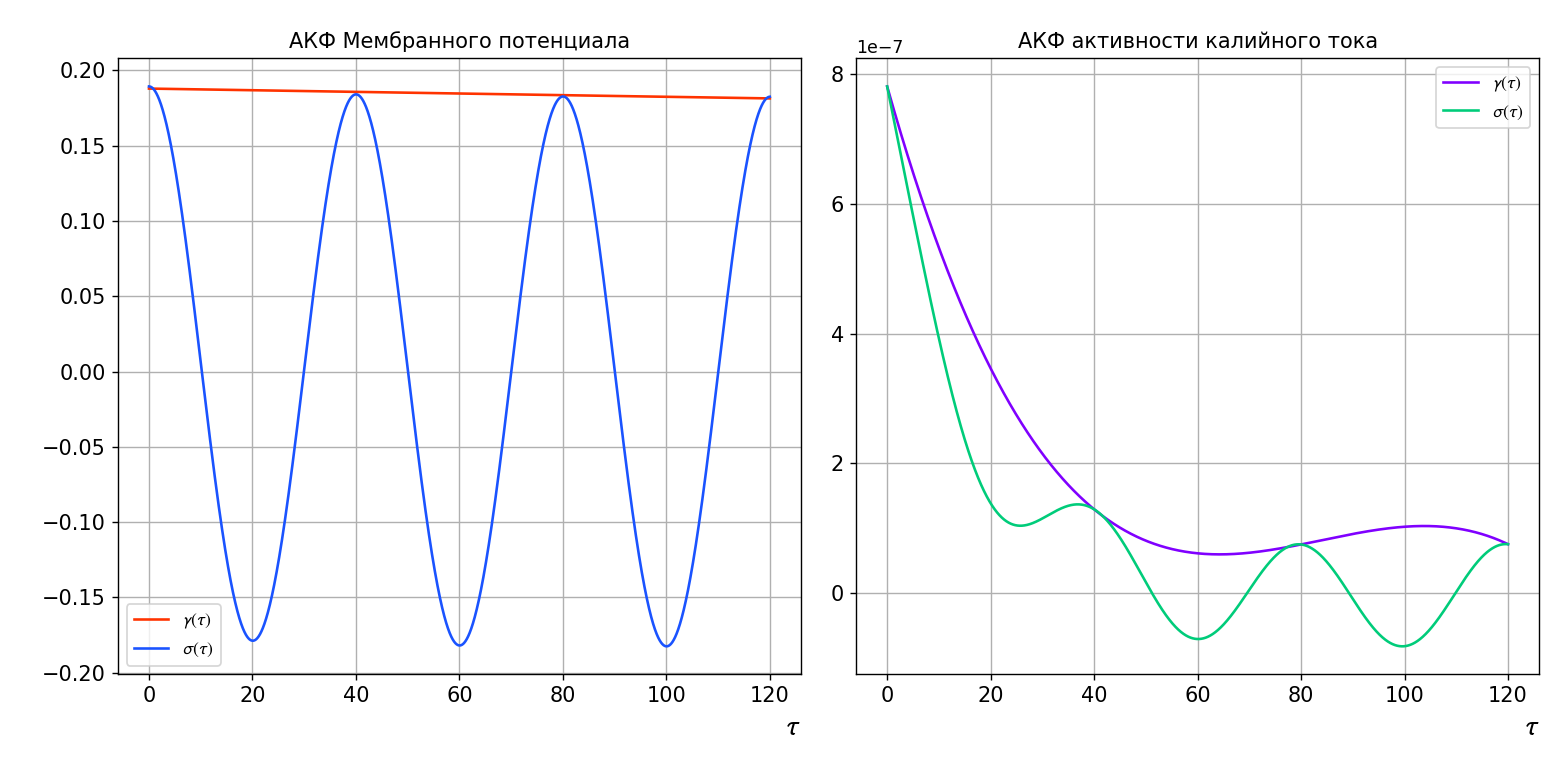

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

graph(ax1, t, beta * np.exp(t * alpha), color='#ff3300', label=r'$\mathcal{\gamma(\tau)}$')
graph(ax1, t, acf_v, color='#1a53ff', title="АКФ Мембранного потенциала", label=r'$\mathcal{\sigma(\tau)}$')
ax1.grid()
ax1.legend()

graph(ax2, t, f(t), color='#8000ff', label=r'$\mathcal{\gamma(\tau)}$')
graph(ax2, t, acf_omega, color='#00cc7a', title="АКФ активности калийного тока", label=r'$\mathcal{\sigma(\tau)}$')
ax2.legend()
ax2.grid()

plt.tight_layout()

Для мембранного потенциала время кореляции можно найти следующим способом

$$\tau_c = \frac{1}{\sigma^2} \int \limits_0^{\infty} \beta \exp(-\alpha\tau) d\tau = \frac{\beta}{\alpha\sigma^2}.$$

In [29]:
print(f'Время корреляции мембранного потенциала: {round(beta / (acf_v[0] * -alpha), 7)}')

Время корреляции мембранного потенциала: 3370.6993396


Полученное значение времени корреляции на порядок больше, чем время наблюдения.

Если обратиться к графику временной зависимости мембранного потенциала, можно заметить, что в определенный момент времени ($\tau = 2.5 T_p$) прекращается уменьшение амплитуды. То есть при увеличении числа шагов дискретизации огибающая функция будет стремиться к виду $\gamma(\tau) = \sigma^2$. Тогда время кореляции будет стримиться к бесконечности $\tau_c \rightarrow \infty$. 

Найдем время корреляции для переменной восстановления $\omega$.

$$\tau_c = \frac{1}{\sigma^2} \int \limits_0^{\infty} \gamma(\tau) d\tau.$$

Коэффициент перед старшой степенью полученного полинома, описывающего закон спадения АКФ, отрицателен. В таком случае время корреляции будет $\tau_c \rightarrow -\infty$, что не имеет смысла. Чтобы избежать этого, необходимо заменить пределы интегрирования ($\infty \rightarrow t_0$, где $t_0~-$корень полинома).

In [104]:
def integrate_f(x):
    return -1.414e-12 * 0.25 * x**4 + 3.564e-10 * x**3 / 3 - 2.829e-08 * 0.5 * x**2 + 7.808e-07 * x

In [124]:
roots_f = np.roots(f)
print('Корни полинома:')
for root in roots_f:
    print(root)

Корни полинома:
(132.58944195557575+0j)
(59.73747295148338+24.42112154555034j)
(59.73747295148338-24.42112154555034j)


Данный полином имеет три корня, из которых только один действительный $x \approx 132.589$.

In [126]:
print(f'Время корреляции активности калийного тока: {round(integrate_f(roots_f[0].real) / acf_omega[0], 7)}')

Время корреляции активности калийного тока: 28.8423585


Дальше вычислим автокорреляционную функцию для мембранного потенциала конфигурации *белый шум* с числом шагов дискретизации $m = 12 000$.

In [127]:
m_noise = 12001
acf_noise = acf(m_noise, df_noise['membrane potential'])

# Переход от числа шагов дискретизации к единицам времени наблюдения
t_noise = np.array([i * h for i in range(m_)])

<IPython.core.display.Javascript object>


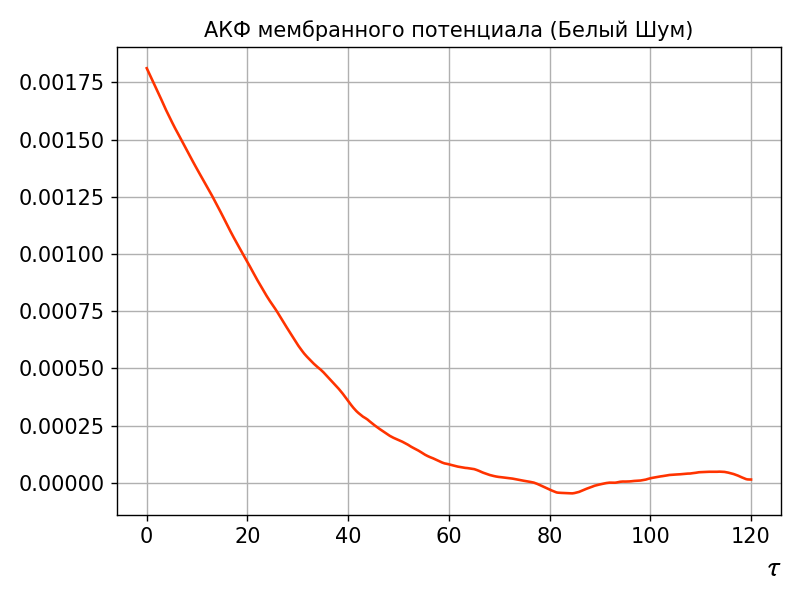

In [135]:
fig, ax = plt.subplots(1, 1)

graph(ax, t_noise, acf_noise, color='#ff3300', title='АКФ мембранного потенциала (Белый Шум)')
plt.tight_layout()

Как и вслучае активности калийного тока $\omega$, будем искать огибающую функцию $\gamma(\tau)$ в виде полинома 3-й степени.

In [136]:
g = np.poly1d(np.polyfit(t_noise, acf_noise, 3))
print(f'искомый полином:\n{g}')

искомый полином:
            3             2
-1.699e-09 x + 5.508e-07 x - 5.669e-05 x + 0.001867


<IPython.core.display.Javascript object>


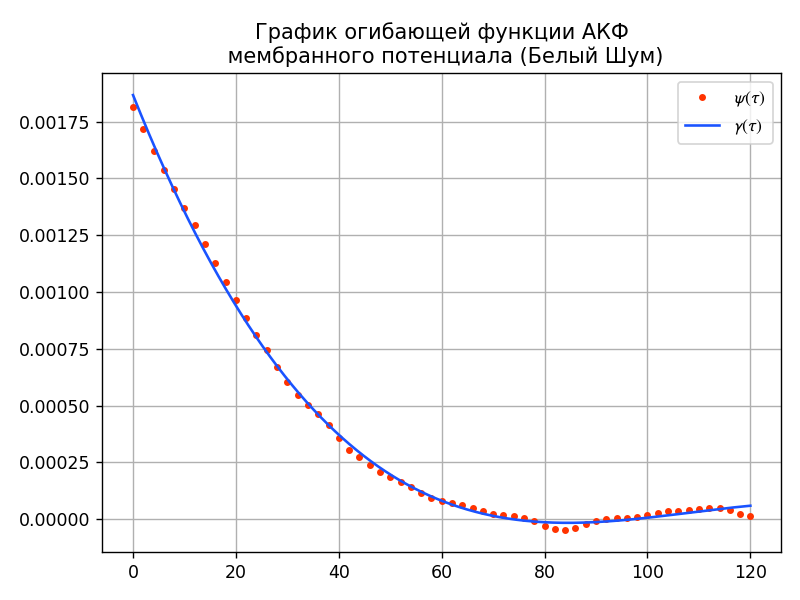

In [175]:
fig, ax = plt.subplots(1, 1)
ax.plot(t_noise,  acf_noise, 'o',  ms=3, markevery=200, color='#ff3300', label=r'$\mathcal{\psi(\tau)}$')
ax.plot(t_noise,  g(t_noise), color='#1a53ff', label=r'$\mathcal{\gamma(\tau)}$')
ax.set(title='График огибающей функции АКФ\n мембранного потенциала (Белый Шум)')
ax.grid()
ax.legend()
plt.tight_layout()

In [176]:
roots_g = np.roots(g)
print('Корни полинома:')
for root in roots_g:
    print(root)

Корни полинома:
153.1816136220307
97.22994128457839
73.77277204894803


В данном случае все корни являются действительными. Найдем время корреляции для наибольшего корня.

In [190]:
def integrate_g(x):
    return 0.25 * -1.788e-09 * x**4 + 5.655e-07 * x**3 / 3 + 0.5 * -5.724e-05 * x**2 + 0.001871 * x 

time_corr = integrate_g(np.max(roots_g)) / acf_v_[0]

print(f'Время корреляции мембранного потенциала (Белый Шум): {round(time_corr, 7)}')

Время корреляции мембранного потенциала (Белый Шум): 25.6385836


## Заключение

В данной работе в качестве введения в корреляционный анализ были рассмотрены

1) Переодический сигнал вида $f(t) = \dfrac{V}{2} - \dfrac{V}{\pi}\bigl(\sin(\omega t) + \frac{1}{2}\sin(2\omega t)\bigr)$. 

  Для данного сигнала была
- найдена автокорреляционная функция, являющаяся также переодической с тем же периодом колебания сигнала;
- расчитано время корреляции $\tau_c \rightarrow \infty$, то есть память о прошлых состояниях сигнала никогда не забывается.


2) Белый шум, как пример Цветного шума.

  - Были сформулированы критерии Белого шума.
  
  - Был сгенирирован временной ряд на основе стандартного нормального распределения. Для полученного набора значений была выполнена проверка соответствия критериям Белого шума:
  
      - Визуализациия сгенирированного временного ряда и его оценка.
      - Подтверждение отсутствия временной зависимости среднего и среднеквадратичного отклонения.
      - Расчет автокорреляционной функции, нахождение ее огибающей функции $\gamma(\tau)$ и времени корреляции $\tau_c$.
      
    Сгенерированный ряд по результатам проверки удовлетворяет необходимым требованиям. Огибающая функция имеет следующий вид $\gamma(\tau) = \sigma^2 \delta(\tau)$, где $\delta(\tau)~-$ 
дельта функция Дирака, а время корреляции $\tau_c = 0$, т.е память о прощлых состояних полность отсутствует.


3) Модель Морриса-Лекара (ML) - упрощенная модель живого нейрона. Данная модель представляет собой двумерную систему нелинейных дифференциальных уравнений 1-го порядка. 

   Были сформерованы временные ряды для нескольких конфигураций внешнего прикладываемого тока, так как вид временной зависимости динамической системы определяется временной зависимость приложенного внешнего тока. При визуальном осмотре графиков зависмостей переменных модели Морриса-Лекара от времени, были отобраны три временных ряда для дальнейшего анализа.
   
   Для каждого ряда была расчитана автокорреляционная функция, найден закон спадения огибающей АКФ и вычисленно время корреляции. 